# Music AI Education

## Objetivo do experimento

- Criar musicas com ritmos e estilos musicais adequados para turmas especificas.
- As musicas tem objetivo de auxiliar o professor com o recurso didatico, sendo que as letras das canções abordarão o conteudo ministrado pelo professor
- As musicas serão geradas por IA no software SUNO e disponibilizando em forma de link

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from matplotlib import colormaps

In [2]:
colorlist = [colormaps]
colorlist

In [3]:
df_p = pd.read_csv("Datasets/pesquisac.csv")
df_p.columns = ["datahora", "rock", "hihop", "mpb", "reggae", "funk", "sertanejo", "gospel", "eletronica", "professor", "faixa_etaria"]
df_r = df_p.drop(columns="datahora")
df_r

,rock,hihop,mpb,reggae,funk,sertanejo,gospel,eletronica,professor,faixa_etaria
0,3,1,1,1,1,1,1,3,NaN,NaN
1,5,3,5,2,1,3,1,5,NaN,NaN
2,1,5,1,1,1,1,1,5,NaN,NaN
3,1,5,4,4,4,1,1,5,NaN,NaN
4,5,4,3,4,1,1,2,5,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
90,3,4,2,2,3,4,1,4,Victor,40 - 50
91,1,1,1,1,1,1,1,1,Victor,25 - 39
92,1,1,5,1,1,1,5,1,Victor,25 - 39
93,5,2,4,2,1,4,1,5,Victor,25 - 39


In [4]:
df_r.faixa_etaria.replace(method="bfill")

C:\Users\ead\AppData\Local\Temp\ipykernel_11912\3207326534.py:1: FutureWarning: The 'method' keyword in Series.replace is deprecated and will be removed in a future version.
  df_r.faixa_etaria.replace(method="bfill")


0     15 - 18
1     15 - 18
2     15 - 18
3     15 - 18
4     15 - 18
       ...   
90    40 - 50
91    25 - 39
92    25 - 39
93    25 - 39
94    50 - 80
Name: faixa_etaria, Length: 95, dtype: object

In [5]:
df_r.professor.fillna("Romulo")

0      Romulo
1      Romulo
2      Romulo
3      Romulo
4      Romulo
       ...   
90     Victor
91     Victor
92     Victor
93     Victor
94    Luciano
Name: professor, Length: 95, dtype: object

In [28]:
df_g = df_r.groupby("professor")[["rock", "hihop", "mpb", "reggae", "funk", "sertanejo", "gospel", "eletronica"]].mean()
df_g

,rock,hihop,mpb,reggae,funk,sertanejo,gospel,eletronica
professor,,,,,,,,
Karython,3.000000,3.500000,3.285714,3.000000,3.214286,3.071429,2.571429,3.642857
Luciano,2.750000,2.416667,3.333333,2.833333,2.250000,3.583333,2.916667,2.166667
Victor,3.117647,2.705882,2.647059,2.117647,2.352941,2.941176,2.470588,2.941176


In [18]:
df_d = df_g.drop(index="Luciano")
df_d = df_d.drop(index="Victor")

In [50]:
df_d

,rock,hihop,mpb,reggae,funk,sertanejo,gospel,eletronica
professor,,,,,,,,
Karython,3.0,3.5,3.285714,3.0,3.214286,3.071429,2.571429,3.642857


<Axes: ylabel='professor'>

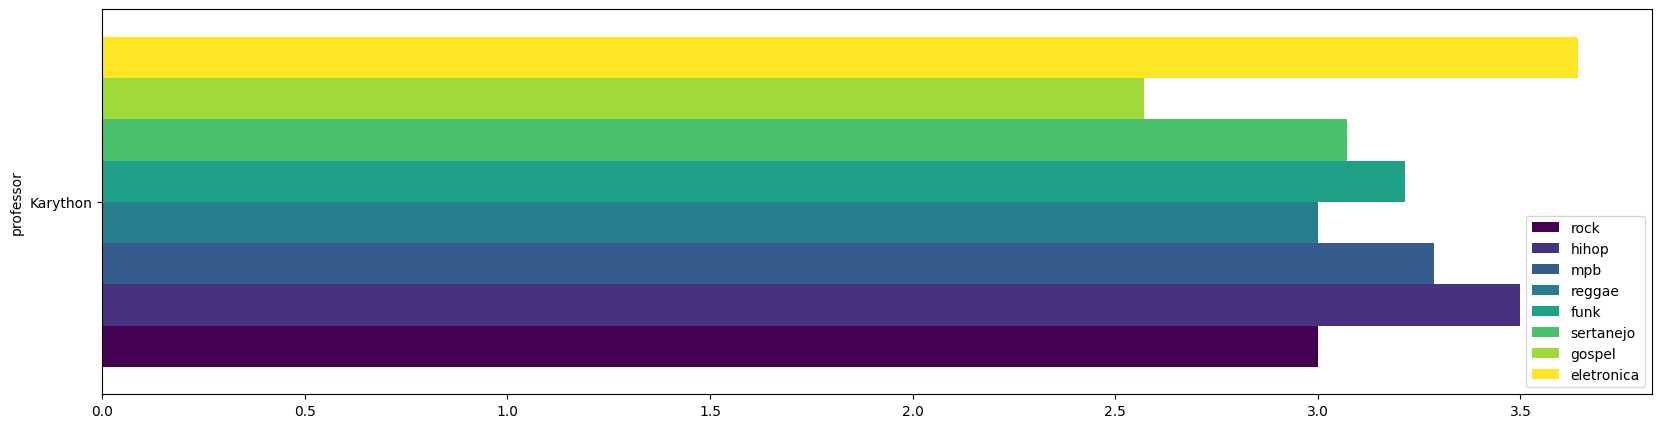

In [78]:
df_d.plot.barh(colormap="viridis", figsize=[20, 5], align="center", width=3)

Text(0.5, 1.0, 'Pesquisa musical turma do karython')

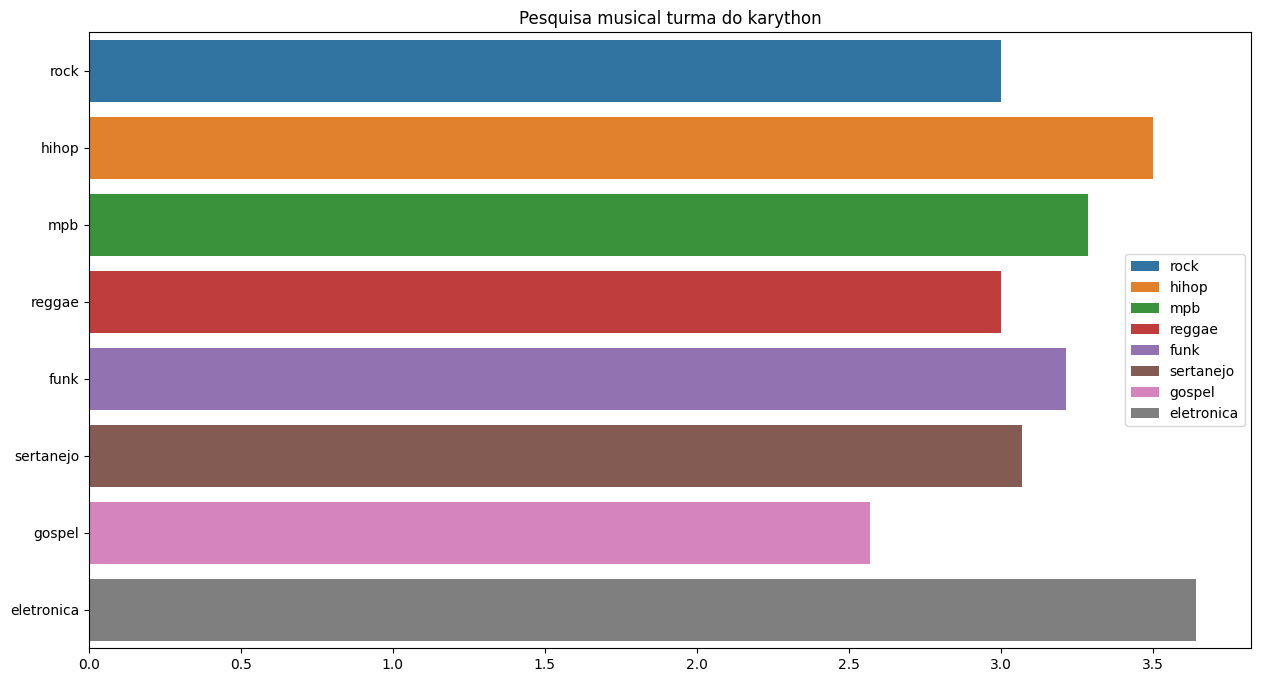

In [77]:
plt.figure(figsize=(15,8))
sns.barplot(df_d, orient="h", legend="full")
plt.title("Pesquisa musical turma do karython")

<Axes: ylabel='Density'>

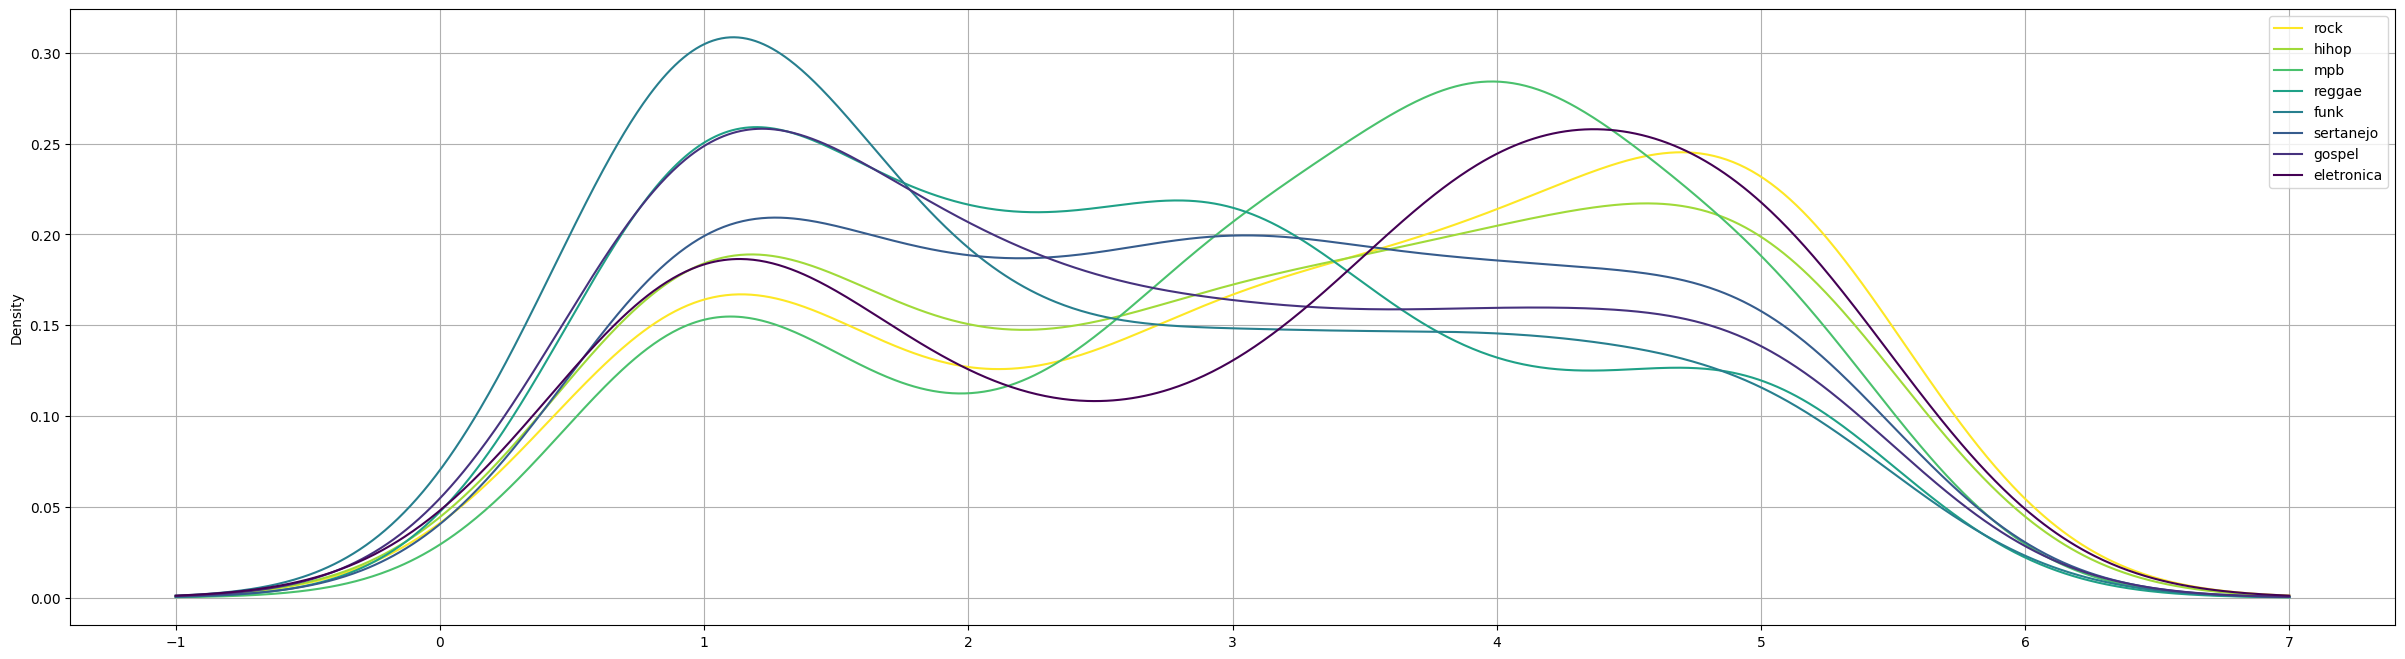

In [6]:
df_r.plot(kind='kde', figsize=[30, 8], grid=True, colormap="viridis_r")